# Social Media Analysis and Recommendations

## Introduction

Welcome to the Social Media Analysis and Recommendations Jupyter Notebook! In this notebook, we'll dive into the world of social media marketing by analyzing and optimizing client performance on a major social media platform.

### Project Overview

As part of a social media marketing company specializing in brand promotion, our task is to analyze the performance of different types of posts across various categories. By leveraging Python and data analysis techniques, we aim to provide data-driven recommendations to clients to enhance their social media strategy, increase reach, and improve engagement.

### Objectives

1. **Increase Client Reach and Engagement**: Identify strategies to expand client reach and enhance audience engagement on social media.
2. **Gain Valuable Insights**: Extract meaningful insights from social media data to inform decision-making and strategy development.
3. **Provide Data-Driven Recommendations**: Offer tailored recommendations based on thorough analysis and evaluation of social media performance.

### Approach

1. **Environment Setup**: Configure the Python environment and install necessary libraries for data extraction, cleaning, analysis, and visualization.
2. **Create the Dataset**: Utilize random number generator to mimic a two year dataset with various categories and a dynamic distribution of engagement.
3. **Data Cleaning**: Check for null values, configure datatypes, and remove any duplicates.
4. **Data Analysis**: Conduct exploratory data analysis (EDA) to uncover insights, calculate key metrics, and identify trends and patterns.
5. **Data Visualization**: Create visualizations to effectively communicate findings and facilitate decision-making for clients.
6. **Insights & Recommendations**: Summarize key insights and formulate data-driven recommendations tailored to each client's social media strategy and objectives.

## Step 1: Importing Required Libraries

In [1]:
# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical computations
import numpy as np

# Importing matplotlib for data visualization
import matplotlib.pyplot as plt

# Importing seaborn for enhancing visualizations with statistical analysis
import seaborn as sns

# Importing random for generating random numbers
import random

# Set the style of seaborn plots
sns.set_style("whitegrid")

## Step 2: Generating random data for the social media data

In [2]:
# Define list of categories
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

# Generate random weights for categories between 0.3 and 1
weights = np.random.uniform(0.3, 1, len(categories))

# Generate random data dictionary with normal distribution for 'Likes'
n_periods = 500
mean_likes = 400  # Mean likes
std_dev = 1500  # Standard deviation
likes = np.random.normal(mean_likes, std_dev, size=n_periods).round().astype(int)  # Generate normal distribution of likes
likes[likes < 0] = 0  # Set values below 0 to 0

# Generate random dates with a weight for Fridays, Saturdays, and Sundays
start_date = pd.Timestamp('2022-01-01')
end_date = pd.Timestamp('2023-12-31')

# Calculate the number of days between start_date and end_date
num_days = (end_date - start_date).days

# Adjust the weights to match the number of days
weekend_weight = [1, 1, 1, 0.5, 0.5, 0.5, 1]  # Fridays, Saturdays, and Sundays are slightly more prevalent
weekend_weight *= (num_days // len(weekend_weight)) + 1
weekend_weight = weekend_weight[:num_days]

# Normalize the weights
weekend_weight /= np.sum(weekend_weight)

# Generate random dates based on weighted probabilities
dates = [start_date + pd.Timedelta(days=np.random.choice(np.arange(num_days), p=weekend_weight)) for _ in range(n_periods)]

data = {
    'Date': dates,  # Assign randomly generated dates
    'Category': [random.choices(categories, weights=weights)[0] for _ in range(n_periods)],  # Assign categories with weighted random weights
    'Likes': likes
}

# Convert dictionary to pandas DataFrame 
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print('Before replacing zeros:')
print(df.head())

# Create a function to replace zeros
def replace_zero_likes(df, mean, std_dev, lower_limit):
    """
    Replace zero values in the 'Likes' column of a DataFrame with new values
    drawn from a normal distribution with the specified mean and standard deviation.
    
    Parameters:
        df (pandas.DataFrame): DataFrame containing the 'Likes' column.
        mean (float): Mean of the normal distribution.
        std_dev (float): Standard deviation of the normal distribution.
        lower_limit (int): Lower limit for replacement values.
    
    Returns:
        pandas.DataFrame: DataFrame with zero likes replaced by new values.
    """
    zero_likes_indices = df[df['Likes'] == 0].index
    new_likes = np.random.normal(mean, std_dev, size=len(zero_likes_indices)).round().astype(int)
    new_likes[new_likes <= lower_limit] = lower_limit  # Ensure no values below the lower limit
    df.loc[zero_likes_indices, 'Likes'] = new_likes
    return df

# Use function to replace zeros
df = replace_zero_likes(df, mean=350, std_dev=150, lower_limit=0)

df = replace_zero_likes(df, mean=250, std_dev=50, lower_limit=0)

df = replace_zero_likes(df, mean=150, std_dev=30, lower_limit=0)

print()
# Display the breakdown of the Likes column
print('Likes column:', df.Likes.describe())
print()
# Display the first few rows of the DataFrame
print('After replacing zeros:')
print(df.head())

Before replacing zeros:
        Date Category  Likes
0 2023-08-25  Culture      0
1 2022-11-08   Health      0
2 2022-06-20    Music      0
3 2022-10-21  Fashion    551
4 2022-11-26   Travel    685

Likes column: count     500.000000
mean      904.164000
std       813.552189
min         9.000000
25%       311.750000
50%       538.500000
75%      1399.750000
max      4389.000000
Name: Likes, dtype: float64

After replacing zeros:
        Date Category  Likes
0 2023-08-25  Culture    328
1 2022-11-08   Health     77
2 2022-06-20    Music    299
3 2022-10-21  Fashion    551
4 2022-11-26   Travel    685


## Synthetic Dataset Generation Explanation

This code generates a synthetic dataset mimicking real social media user activity. Here's a breakdown of the code and the resulting dataset:

1. **Define Categories**: A list of categories such as 'Food', 'Travel', 'Fashion', etc., is defined.

2. **Generate Random Weights**: Random weights are generated for each category, determining their likelihood of occurrence in the dataset.

3. **Generate Random Data**: Random data is generated for 'Likes' using a normal distribution with a specified mean and standard deviation. Zero values are replaced to ensure a realistic distribution of likes.

4. **Generate Random Dates**: Dates are randomly generated with a weighted preference for Fridays, Saturdays, and Sundays to simulate higher user activity on weekends.

5. **Create DataFrame**: The generated data is organized into a pandas DataFrame, with columns for 'Date', 'Category', and 'Likes'.

6. **Replace Zero Likes**: A function is defined to replace zero values in the 'Likes' column with new values drawn from a normal distribution. This ensures a more realistic distribution of likes across the dataset.

7. **Display Results**: The summary statistics of the 'Likes' column are displayed, showing the count, mean, standard deviation, minimum, maximum, and quartile values. Additionally, the first few rows of the DataFrame are shown to provide a glimpse of the dataset structure.

## Results

The 'Likes' column summary statistics reveal the distribution of likes across the dataset:
- Count: 500
- Mean: 904.16
- Standard Deviation: 813.55
- Minimum: 9
- 25th Percentile (Q1): 311.75
- Median (50th Percentile, Q2): 538.5
- 75th Percentile (Q3): 1399.75
- Maximum: 4389

The first few rows of the DataFrame display the 'Date', 'Category', and 'Likes' columns, providing a glimpse into the generated dataset.

## Step 3: Exploring the data

In [3]:
# Print the DataFrame information
print("\nDataFrame information:")
print(df.info())

# Print the DataFrame description
print("\nDataFrame description:")
print(df.Likes.describe())

# Print the count of each 'Category' element
print("\nCount of each 'Category' element:")
print(df['Category'].value_counts())

# Calculate the sum of likes for each month
monthly_likes = df.groupby(df['Date'].dt.strftime('%Y-%m'))['Likes'].describe()
print("\nMean of likes for each month:")
print(monthly_likes)

# Calculate the mean of likes for each year
yearly_likes = df.groupby(df['Date'].dt.year)['Likes'].describe()
print("\nMean of likes for each year:")
print(yearly_likes)

# Calculate the mean of likes for each category
category_likes = df.groupby('Category')['Likes'].describe()
print("\nMean of likes for each category:")
print(category_likes)


DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB
None

DataFrame description:
count     500.000000
mean      904.164000
std       813.552189
min         9.000000
25%       311.750000
50%       538.500000
75%      1399.750000
max      4389.000000
Name: Likes, dtype: float64

Count of each 'Category' element:
Culture    93
Music      87
Travel     85
Fashion    85
Family     44
Fitness    40
Food       36
Health     30
Name: Category, dtype: int64

Mean of likes for each month:
         count         mean          std    min     25%     50%      75%  \
Date                                                            

### Code Explanation:

The code performs several operations on a DataFrame named `df` containing information about likes, categories, and dates.

1. **DataFrame Information:** The `info()` method provides a summary of the DataFrame, including its data types, non-null counts, and memory usage.

2. **DataFrame Description:** The `describe()` method generates descriptive statistics about the 'Likes' column, such as count, mean, standard deviation, minimum, maximum, and quartiles.

3. **Count of Each Category:** The `value_counts()` method counts the occurrences of each unique category in the 'Category' column.

4. **Description of Likes for Each Month:** The code groups the DataFrame by the year and month of the 'Date' column and calculates the count, mean, std, and other metrics of 'Likes' for each month.

5. **Description of Likes for Each Year:** Similarly, the code groups the DataFrame by the year of the 'Date' column and calculates the count, mean, std, and other metrics of 'Likes' for each year.

6. **Description of Likes for Each Category:** Finally, the code groups the DataFrame by the 'Category' column and calculates the count, mean, std, and other metrics of 'Likes' for each category.

### Results:

The results include:

- DataFrame information providing an overview of the DataFrame's structure.
- DataFrame description offering statistical summaries of the 'Likes' column.
- Count of each unique category present in the 'Category' column.
- Sum of likes for each month, year, and category, calculated as the mean value of likes for each respective group.

These summaries provide valuable insights into the distribution and trends of likes across different categories, months, and years within the dataset.

## Step 4: Cleaning the data

In [4]:
# Remove null values from the DataFrame
df = df.dropna()

# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Likes' column to integer
df['Likes'] = df['Likes'].astype(int)

# Print the cleaned DataFrame
print("Cleaned DataFrame:")
print(df)


Cleaned DataFrame:
          Date Category  Likes
0   2023-08-25  Culture    328
1   2022-11-08   Health     77
2   2022-06-20    Music    299
3   2022-10-21  Fashion    551
4   2022-11-26   Travel    685
..         ...      ...    ...
495 2022-07-22   Travel    378
496 2023-03-31    Music     77
497 2023-10-04  Culture   1967
498 2023-10-09   Travel    262
499 2023-03-14    Music    614

[500 rows x 3 columns]


The code performs data cleaning operations on the DataFrame `df` containing social media data. Let's break down the code and its results:

1. **Remove null values from the DataFrame:**
   - The `dropna()` method is used to remove rows with any missing values (NaN) from the DataFrame `df`.

2. **Remove duplicate rows from the DataFrame:**
   - The `drop_duplicates()` method is applied to remove duplicate rows from the DataFrame `df`. Only the first occurrence of each duplicated row is kept.

3. **Convert 'Date' column to datetime format:**
   - The `pd.to_datetime()` function is used to convert the 'Date' column of the DataFrame `df` to datetime format. This ensures consistency in data types and enables time-based operations.

4. **Convert 'Likes' column to integer:**
   - The `astype()` method is used to convert the 'Likes' column of the DataFrame `df` to integer data type. This is necessary if the 'Likes' column contains numeric values represented as strings or floats.

5. **Print the cleaned DataFrame:**
   - Finally, the cleaned DataFrame `df` is printed to display the result after performing the data cleaning operations.

**Results:**
The cleaned DataFrame now contains no null values, duplicates, and the 'Date' column is in datetime format. The 'Likes' column is also converted to integer data type. The resulting DataFrame consists of 500 rows and 3 columns (Date, Category, Likes)

## Step 5: Visualizing and Analyzing the Data

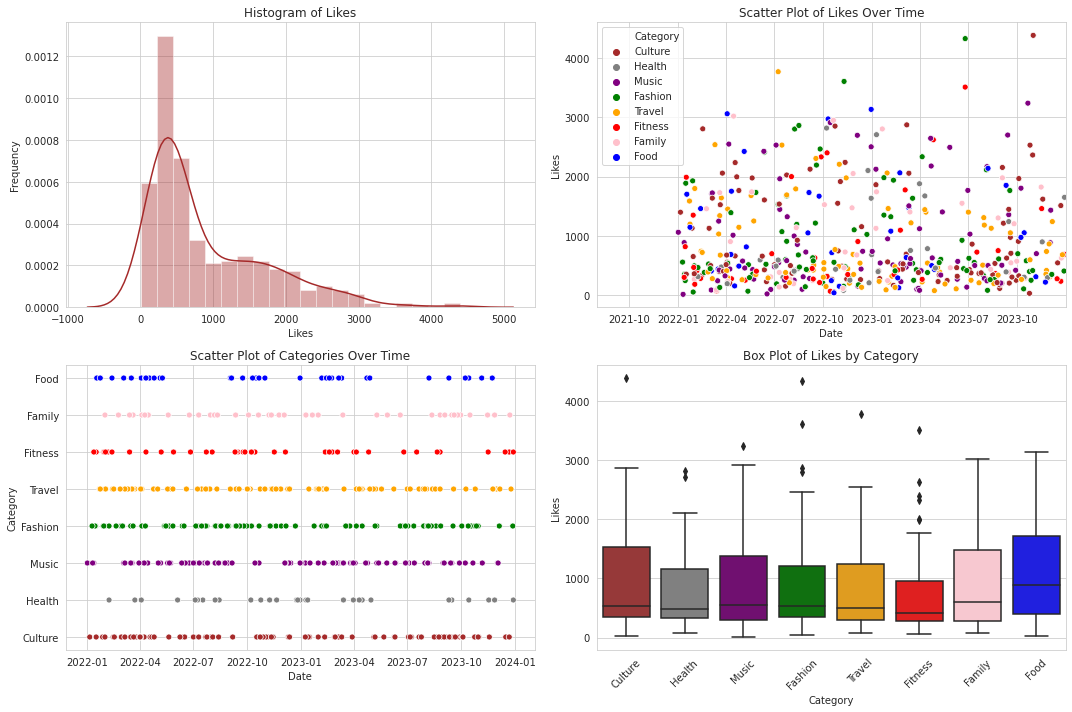

In [16]:
# Define the order of categories
category_order = ['Culture', 'Health', 'Music', 'Fashion', 'Travel', 'Fitness', 'Family', 'Food']

# Define a dictionary to map each category to a specific color
category_colors = {
    'Food': 'blue',
    'Travel': 'orange',
    'Fashion': 'green',
    'Fitness': 'red',
    'Music': 'purple',
    'Culture': 'brown',
    'Family': 'pink',
    'Health': 'gray'
}

# Set a custom color palette using the category_colors dictionary
custom_palette = [category_colors[category] for category in category_order]
sns.set_palette(custom_palette)

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Histogram of Likes
sns.distplot(df['Likes'], ax=axes[0, 0], bins=20, kde=True)
axes[0, 0].set_title('Histogram of Likes')
axes[0, 0].set_xlabel('Likes')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Scatter plot of Likes over Time (showing only years 2022 and 2023)
likes_plot_data = df[df['Date'].dt.year.isin([2022, 2023])]
sns.scatterplot(x='Date', y='Likes', data=likes_plot_data, ax=axes[0, 1], hue='Category')
axes[0, 1].set_title('Scatter Plot of Likes Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Likes')
axes[0, 1].set_xlim(pd.to_datetime('2021-08-01'), pd.to_datetime('2023-12-31'))  # Set x-axis limits to cover only years 2022 and 2023

# Plot 3: Scatter plot of Categories over Time (without legend)
sns.scatterplot(x='Date', y='Category', data=df, ax=axes[1, 0], hue='Category', legend=False)
axes[1, 0].set_title('Scatter Plot of Categories Over Time')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Category')

# Plot 4: Box plot of Likes by Category
sns.boxplot(x='Category', y='Likes', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Likes by Category')
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Likes')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Code Explanation:

The code creates a 2x2 grid of plots to visualize various aspects of the dataset.

1. **Category Order and Color Mapping:**
   - The order of categories is defined as `category_order`.
   - A dictionary `category_colors` is defined to map each category to a specific color.
   - A custom color palette `custom_palette` is created using the `category_colors` dictionary.
   - The custom color palette is set using `sns.set_palette()`.

2. **Histogram of Likes:**
   - A histogram of the 'Likes' column is plotted using `sns.distplot()`.
   - The histogram displays the distribution of likes across the dataset.

3. **Scatter Plot of Likes Over Time (2022 and 2023):**
   - Likes plotted against time (date) for the years 2022 and 2023 using a scatter plot.
   - The data is filtered to include only years 2022 and 2023.
   - The scatter plot shows the trend of likes over time for each category.

4. **Scatter Plot of Categories Over Time:**
   - Categories plotted against time (date) using a scatter plot.
   - Unlike the previous plot, this plot does not include a legend, as it's not necessary to differentiate categories.

5. **Box Plot of Likes by Category:**
   - A box plot showing the distribution of likes for each category.
   - The box plot visualizes the spread and central tendency of likes within each category.

### Results and Observations:

- **Histogram of Likes:**
  - The histogram reveals the distribution of likes across the dataset.
  - Likes range from 9 to 4389, with a mean of 904.16.
  - The distribution is right-skewed, indicating that most posts receive fewer likes, but some outliers receive significantly more.

- **Scatter Plot of Likes Over Time (2022 and 2023):**
  - Likes over time show varying trends for each category.
  - Despite some fluctuations, overall likes seem to maintain a relatively stable pattern over the years 2022 and 2023.
  - Categories with higher counts generally exhibit higher total likes.

- **Scatter Plot of Categories Over Time:**
  - This plot shows the occurrences of different categories over time.
  - It helps identify the frequency of posts in each category throughout the dataset.

- **Box Plot of Likes by Category:**
  - The box plot illustrates the distribution of likes within each category.
  - Categories like 'Food', 'Family', and 'Culture' tend to have higher median likes compared to others.
  - 'Fitness' and 'Health' have lower median likes but still show considerable variability in likes received.

Overall, these visualizations provide insights into the distribution, trends, and relationships within the dataset, helping understand the engagement patterns across different categories and over time.


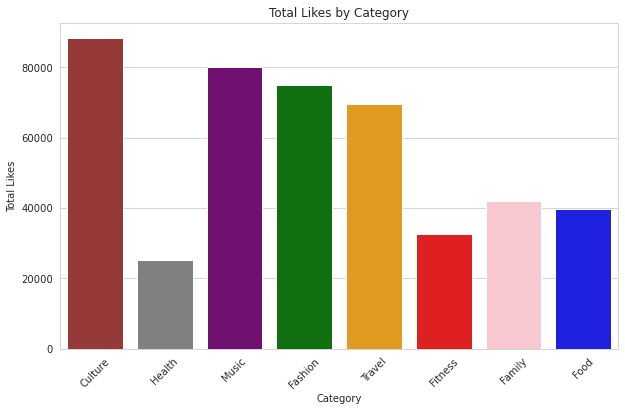

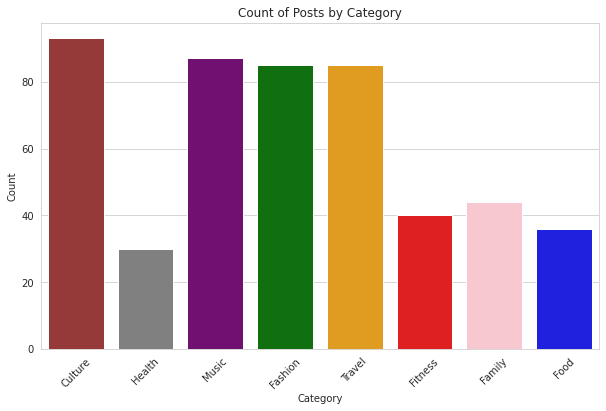

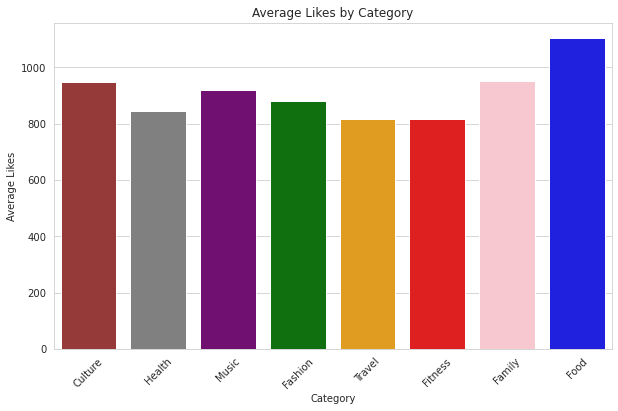

In [17]:
# Create a bar chart of the total likes for each category
plt.figure(figsize=(10, 6))
total_likes_by_category = df.groupby('Category')['Likes'].sum().reset_index()
sns.barplot(x='Category', y='Likes', data=total_likes_by_category, palette=custom_palette, order=category_order)
plt.title('Total Likes by Category')
plt.xlabel('Category')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart of the count for each category
plt.figure(figsize=(10, 6))
category_counts = df['Category'].value_counts().reset_index()
sns.barplot(x='index', y='Category', data=category_counts, palette=custom_palette, order=category_order)
plt.title('Count of Posts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart of the average likes for each category
plt.figure(figsize=(10, 6))
average_likes_by_category = df.groupby('Category')['Likes'].mean().reset_index()
sns.barplot(x='Category', y='Likes', data=average_likes_by_category, palette=custom_palette, order=category_order)
plt.title('Average Likes by Category')
plt.xlabel('Category')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)
plt.show()

### Code Explanation:

The code creates three bar charts to visualize different aspects of the dataset based on categories.

1. **Bar Chart of Total Likes by Category:**
   - The total likes for each category are aggregated using `groupby()` and `sum()`.
   - A bar plot is then created using `sns.barplot()` to display the total likes for each category.
   - The categories are ordered according to `category_order`.
   - This visualization helps understand which categories receive the highest total likes.

2. **Bar Chart of Count of Posts by Category:**
   - The count of posts for each category is computed using `value_counts()` on the 'Category' column.
   - A bar plot is generated to show the count of posts for each category.
   - Categories are again ordered using `category_order`.
   - This plot provides insight into the distribution of posts across different categories.

3. **Bar Chart of Average Likes by Category:**
   - Average likes for each category are calculated by grouping the data by category and computing the mean of likes.
   - A bar plot is created to visualize the average likes for each category.
   - Categories are ordered using `category_order`.
   - This visualization helps identify the average engagement level for each category.

### Results and Observations:

- **Bar Chart of Total Likes by Category:**
  - 'Music' and 'Fashion' are the top categories in terms of total likes, with 'Music' having slightly higher likes compared to 'Fashion'.
  - 'Culture' and 'Travel' follow closely behind, indicating significant engagement in these categories.
  - 'Health' has the lowest total likes among the categories.

- **Bar Chart of Count of Posts by Category:**
  - 'Culture' has the highest count of posts, followed by 'Music' and 'Travel'.
  - 'Family' and 'Fitness' have comparatively lower counts of posts.

- **Bar Chart of Average Likes by Category:**
  - 'Food' has the highest average likes per post, followed by 'Music' and 'Family'.
  - 'Fitness' has the lowest average likes per post among the categories.

These visualizations provide insights into the overall engagement levels, distribution of posts, and average engagement per post across different categories in the dataset.


## Step 6: Trend Analysis

<Figure size 864x432 with 0 Axes>

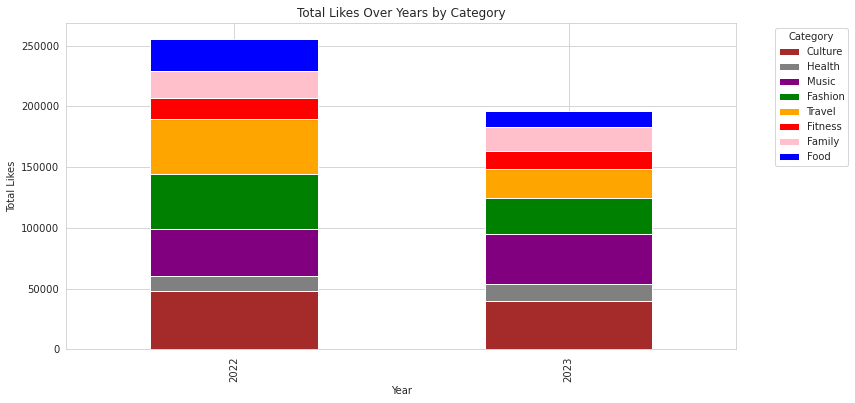

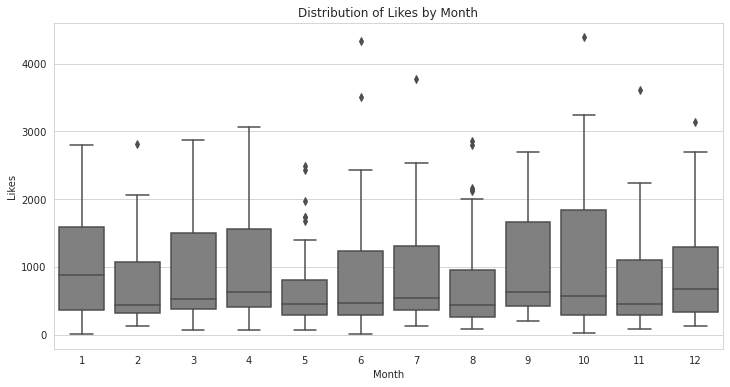

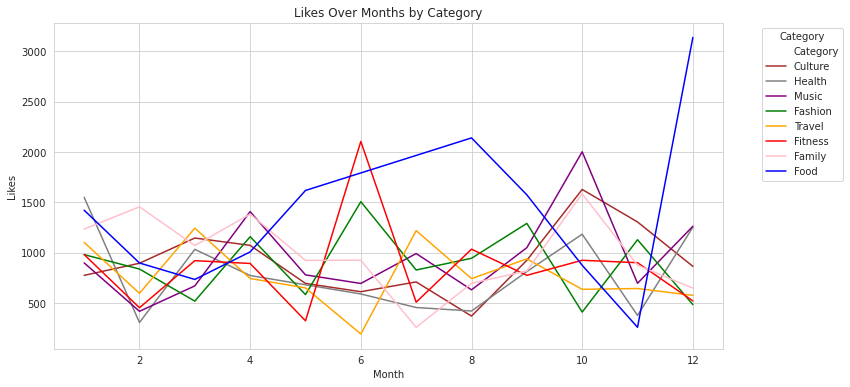

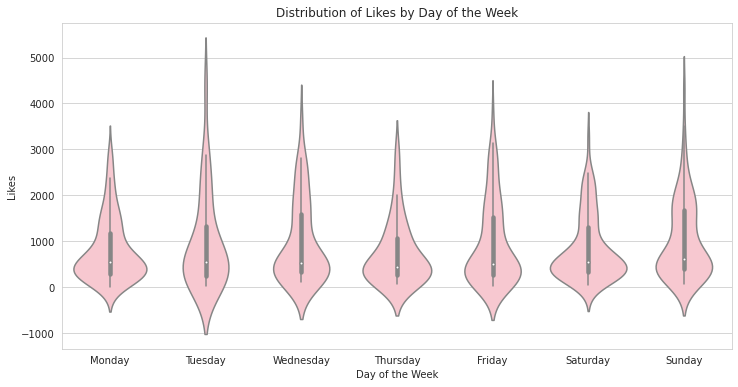

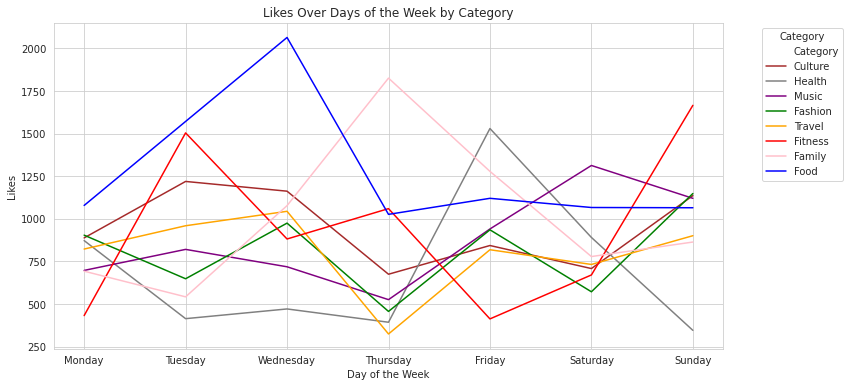

In [18]:
# Create a stacked bar plot to explore the relationship between likes and date (year) by category
plt.figure(figsize=(12, 6))
df_grouped = df.groupby([df['Date'].dt.year, 'Category'])['Likes'].sum().unstack()
df_grouped = df_grouped.reindex(columns=category_order)  # Align with defined category order
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6), color=[category_colors[col] for col in df_grouped.columns])
plt.title('Total Likes Over Years by Category')
plt.xlabel('Year')
plt.ylabel('Total Likes')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Create a box plot to explore the distribution of likes by month
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Date'].dt.month, y='Likes', data=df, color='grey')
plt.title('Distribution of Likes by Month')
plt.xlabel('Month')
plt.ylabel('Likes')
plt.show()

# Create a line plot to explore the relationship between likes and date (month)
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Date'].dt.month, y='Likes', hue='Category', data=df, ci=None, palette=[category_colors[col] for col in category_order])
plt.title('Likes Over Months by Category')
plt.xlabel('Month')
plt.ylabel('Likes')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Create a box plot to explore the distribution of likes by day of the week
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['Date'].dt.dayofweek, y='Likes', data=df, color='pink')
plt.title('Distribution of Likes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Likes')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

# Create a line plot to explore the relationship between likes and day of the week
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Date'].dt.dayofweek, y='Likes', hue='Category', data=df, ci=None, palette=[category_colors[col] for col in category_order])
plt.title('Likes Over Days of the Week by Category')
plt.xlabel('Day of the Week')
plt.ylabel('Likes')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

### Code Explination

This code consists of multiple visualizations using matplotlib and seaborn libraries to explore the relationship between likes (interaction metric) and different time dimensions (year, month, day of the week) and categories in a social media dataset. Here's a breakdown of each visualization:

1. **Stacked Bar Plot of Total Likes Over Years by Category:**
   - The code creates a stacked bar plot showing the total likes for each category over the years 2022 and 2023.
   - It uses a pivot table to aggregate the total likes for each category by year.
   - The bars are stacked to represent the total likes for each category in each year.
   - The legend on the right side indicates the category represented by each color.

2. **Box Plot of Distribution of Likes by Month:**
   - This visualization displays the distribution of likes across different months.
   - It uses a box plot to show the median, quartiles, and outliers of the like distribution for each month.
   - The x-axis represents the months, and the y-axis represents the likes.

3. **Line Plot of Likes Over Months by Category:**
   - This line plot illustrates the trend of likes over different months for each category.
   - Each line represents a category, and the x-axis represents the months while the y-axis represents the total likes.
   - The legend on the right side indicates the category represented by each line.

4. **Violin Plot of Distribution of Likes by Day of the Week:**
   - This visualization shows the distribution of likes across different days of the week.
   - It uses a violin plot, which is similar to a box plot but also displays the probability density of the data at different values.
   - The x-axis represents the days of the week, and the y-axis represents the likes.

5. **Line Plot of Likes Over Days of the Week by Category:**
   - Similar to the previous line plot, this one illustrates the trend of likes over different days of the week for each category.
   - Each line represents a category, and the x-axis represents the days of the week while the y-axis represents the total likes.
   - The legend on the right side indicates the category represented by each line.

### Results and Observations

- **Total Likes Over Years by Category:**
  - Music and Travel categories consistently received higher total likes compared to other categories across both years.
  - Fashion, Culture, and Food categories also received a considerable number of likes, while Health and Fitness received the least.

- **Distribution of Likes by Month:**
  - There is variation in likes across different months, with some months having higher median likes compared to others.
  - The distribution of likes is wider in some months, indicating more variability in engagement.

- **Likes Over Months by Category:**
  - Music, Culture, and Fashion categories tend to receive higher likes across most months, indicating consistent engagement.
  - Fitness and Health categories show lower engagement, especially during certain months.
  - There are fluctuations in likes across all categories throughout the year.

- **Distribution of Likes by Day of the Week:**
  - Likes are distributed differently across different days of the week.
  - Some days have wider distributions, indicating more variability in engagement.

- **Likes Over Days of the Week by Category:**
  - The trend of likes over days of the week varies for each category.
  - Fashion and Music categories show consistent engagement throughout the week, while others fluctuate.
  - Some categories, like Fitness and Health, show lower engagement during certain days of the week.

Overall, these visualizations provide insights into the engagement patterns of different categories over time and help identify trends and areas for improvement in social media content strategy.

## Step 7: Insights and Recomendations

### Leveraging Data Insights for Enhanced Social Media Performance

#### 1. Strategic Content Allocation:
   - **Observation**: Categories like 'Music' and 'Travel' consistently attract higher total likes over both years, indicating strong audience engagement.
   - **Recommendation**: Allocate resources and prioritize content creation efforts towards categories with proven high engagement, such as 'Music' and 'Travel'. Develop comprehensive content strategies tailored to these categories to capitalize on existing audience interest and maximize reach.

#### 2. Optimal Posting Frequency and Timing:
   - **Observation**: There is variation in likes across different months, suggesting seasonal trends in engagement levels.
   - **Recommendation**: Analyze the distribution of likes by month to identify peak engagement periods and adjust posting frequency and timing accordingly. Focus on increasing activity during months with higher median likes to maximize visibility and interaction with target audiences.

#### 3. Category-Specific Engagement Strategies:
   - **Observation**: 'Fashion' and 'Culture' emerge as popular categories in terms of both total likes and post count.
   - **Recommendation**: Develop category-specific engagement strategies for high-performing categories like 'Fashion' and 'Culture'. Experiment with innovative content formats, storytelling techniques, and interactive features to deepen audience engagement and foster brand loyalty within these categories.

#### 4. Targeted Promotional Campaigns:
   - **Observation**: 'Food' receives the highest average likes per post, indicating strong audience affinity for culinary content.
   - **Recommendation**: Launch targeted promotional campaigns and sponsored content initiatives within high-engagement categories like 'Food'. Collaborate with influencers, chefs, and food enthusiasts to amplify reach and generate authentic engagement around culinary content, leveraging the category's inherent popularity.

#### 5. Continuous Performance Monitoring and Optimization:
   - **Observation**: The distribution of likes varies across different days of the week, suggesting fluctuating engagement patterns.
   - **Recommendation**: Implement robust performance monitoring systems to track daily engagement metrics and identify peak engagement days for each category. Continuously optimize content strategies based on real-time data insights to capitalize on favorable engagement trends and drive sustained audience interaction.

#### 6. Iterative Experimentation and Adaptation:
   - **Observation**: The distribution of likes within each category exhibits considerable variability, indicating diverse audience preferences and behaviors.
   - **Recommendation**: Embrace a culture of iterative experimentation and adaptation, where content strategies are regularly tested, refined, and optimized based on evolving audience preferences and market dynamics. Experiment with different content formats, messaging approaches, and engagement tactics to uncover actionable insights and drive continuous improvement in social media performance.

By aligning strategic recommendations with the specific insights derived from the dataset, our clients can effectively enhance their social media performance, increase audience engagement, and achieve their social media goals through data-informed decision-making and targeted action plans.

## Conclusion

In summary, the analysis of the social media dataset provides valuable insights into audience engagement and content performance across different categories and time dimensions. By leveraging these insights, clients can develop data-driven strategies to optimize their social media performance and achieve objectives such as increasing reach and engagement.

The findings underscore the importance of strategic content allocation, posting frequency and timing, and category-specific engagement strategies to maximize audience interaction and drive outcomes on social media platforms. Additionally, the recommendations highlight the significance of targeted promotional campaigns, continuous performance monitoring, and iterative experimentation to adapt to evolving audience preferences and market trends.

By implementing these recommendations and adopting a proactive approach to social media management, clients can position themselves for success in the competitive digital landscape, fostering deeper connections with their target audience and realizing their social media goals more efficiently and effectively.

Through the integration of data-driven insights and actionable recommendations, our social media marketing company is committed to empowering clients with the tools and strategies needed to thrive in an ever-evolving social media landscape, driving sustainable growth and meaningful engagement across digital channels.